K-means Clustering Algorithm Test (v1.6)

This notebook aims to test the performance and accuracy of the K-means clustering algorithm. K-means is an unsupervised learning algorithm used to partition a given item_list into ‘k’ distinct clusters. This algorithm iteratively assigns each data point to the nearest centroid based on Euclidean distance and then recalculates the centroid’s position. The process continues until convergence, where the centroids no longer change significantly.

Version 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.2:  # Adjust the probability of adding a large gap
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))  # Adjust the number of data points in the large gap
    return np.array(X_modified)

def elbow_plot(X, max_clusters=10):
    total_variations = []
    num_samples = len(X)

    for n_clusters in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

    # Find elbow point using "knee" point detection
    differences = np.diff(total_variations)
    max_diff_index = np.argmax(differences) + 1
    best_labels, best_centers = KMeans(n_clusters=max_diff_index, n_init=10).fit(X.reshape(-1, 1)).labels_, KMeans(n_clusters=max_diff_index, n_init=10).fit(X.reshape(-1, 1)).cluster_centers_

    plt.plot(range(1, max_diff_index+1), total_variations[:max_diff_index])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')
    plt.show()

    return best_labels, best_centers



# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)  # Randomly generate average shopping duration in minutes
num_timestamps = np.random.randint(6, 12)  # Randomly generate number of timestamps

timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)

# Add larger gaps in some timestamps
gap_size = np.random.randint(0, 60)  # Randomly generate the size of the larger gap
X = add_large_gaps(timestamps, gap_size)

# Perform k-means clustering and plot the elbow plot
if max_clusters > num_timestamps:
    max_clusters = num_timestamps

best_labels, best_centers = elbow_plot(X, max_clusters)
print('Optimal number of clusters:', len(best_centers))

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)  # Convert seconds to minutes and seconds
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)  # Format time as HH:MM
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.2:  # Adjust the probability of adding a large gap
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))  # Adjust the number of data points in the large gap
    return np.array(X_modified)

def elbow_plot(X, max_clusters=5):
    n_clusters = 1
    prev_total_variation = float('inf')
    cycles_without_change = 0
    total_variations = []
    num_samples = len(X)

    while cycles_without_change < 10 and n_clusters < num_samples and n_clusters <= max_clusters: 
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        closest_centers, _ = pairwise_distances_argmin_min(centers, X.reshape(-1, 1))
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

        if total_variation >= prev_total_variation:
            cycles_without_change += 1
        else:
            prev_total_variation = total_variation
            cycles_without_change = 0
            best_labels = labels + 1
            best_centers = centers

        n_clusters += 1

    plt.plot(range(1, n_clusters), total_variations)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')
    plt.show()

    return best_labels, best_centers

# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)  # Randomly generate average shopping duration in minutes
num_timestamps = np.random.randint(6, 12)  # Randomly generate number of timestamps

timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)

# Add larger gaps in some timestamps
gap_size = np.random.randint(0, 60)  # Randomly generate the size of the larger gap
X = add_large_gaps(timestamps, gap_size)

# Perform k-means clustering and plot the elbow plot
best_labels, best_centers = elbow_plot(X)
print('Optimal number of clusters:', len(best_centers))

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)  # Convert seconds to minutes and seconds
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)  # Format time as HH:MM
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.2:  # Adjust the probability of adding a large gap
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))  # Adjust the number of data points in the large gap
    return np.array(X_modified)

def find_elbow_point(X):
    n_clusters = 1
    prev_total_variation = float('inf')
    cycles_without_change = 0
    total_variations = []
    num_samples = len(X)

    while cycles_without_change < 10 and n_clusters < num_samples: 
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        closest_centers, _ = pairwise_distances_argmin_min(centers, X.reshape(-1, 1))
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

        if total_variation >= prev_total_variation:
            cycles_without_change += 1
        else:
            prev_total_variation = total_variation
            cycles_without_change = 0
            best_labels = labels + 1
            best_centers = centers

        n_clusters += 1

    elbow_index = np.argmax(np.gradient(np.gradient(total_variations)))

    plt.plot(range(1, n_clusters), total_variations)
    plt.axvline(x=elbow_index + 1, color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')
    plt.show()

    return best_labels, best_centers, elbow_index + 1

# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)  # Randomly generate average shopping duration in minutes
num_timestamps = np.random.randint(6, 12)  # Randomly generate number of timestamps

timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)

# Add larger gaps in some timestamps
gap_size = np.random.randint(0, 60)  # Randomly generate the size of the larger gap
X = add_large_gaps(timestamps, gap_size)

# Perform k-means clustering and plot the elbow plot
best_labels, best_centers, optimal_k = find_elbow_point(X)
print('Optimal number of clusters:', optimal_k)

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)  # Convert seconds to minutes and seconds
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)  # Format time as HH:MM
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.5:
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))
    return np.array(X_modified)

def find_elbow_point(X, min_clusters=2, max_clusters=None, min_improvement=0.01, cycles_without_change=10):
    if max_clusters is None:
        max_clusters = len(X)

    best_total_variation = float('inf')
    best_labels = None
    best_centers = None
    best_elbow_index = 0

    total_variations = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        closest_centers, _ = pairwise_distances_argmin_min(centers, X.reshape(-1, 1))
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

        if total_variation < best_total_variation:
            best_total_variation = total_variation
            best_labels = labels + 1
            best_centers = centers
            best_elbow_index = n_clusters - 1

        if len(total_variations) >= 3:  
            consecutive_improvements = np.diff(np.gradient(total_variations))
            if all(imp >= min_improvement for imp in consecutive_improvements[-cycles_without_change:]):
                break

    plt.plot(range(min_clusters, n_clusters + 1), total_variations)
    plt.axvline(x=best_elbow_index + min_clusters, color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')
    plt.show()

    return best_labels, best_centers, best_elbow_index + min_clusters

# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)
num_timestamps = np.random.randint(6, 12)
timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)
gap_size = np.random.randint(0, 60)
X = add_large_gaps(timestamps, gap_size)

# Perform k-means clustering and plot the elbow plot
best_labels, best_centers, optimal_k = find_elbow_point(X)
print('Optimal number of clusters:', optimal_k)
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(X.reshape(-1, 1))
best_labels = kmeans.labels_
best_centers = kmeans.cluster_centers_

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.5:
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))
    return np.array(X_modified)

def find_elbow_point(X, min_clusters=2, max_clusters=None, min_improvement=0.01, cycles_without_change=10):
    if max_clusters is None:
        max_clusters = len(X)

    best_total_variation = float('inf')
    best_labels = None
    best_centers = None
    best_elbow_index = 0

    total_variations = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        closest_centers, _ = pairwise_distances_argmin_min(centers, X.reshape(-1, 1))
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

        if total_variation < best_total_variation:
            best_total_variation = total_variation
            best_labels = labels + 1
            best_centers = centers
            best_elbow_index = n_clusters - 1

        if len(total_variations) >= 3:
            consecutive_improvements = np.diff(np.gradient(total_variations))
            if all(imp >= min_improvement for imp in consecutive_improvements[-cycles_without_change:]):
                break

    # Finding the elbow point
    curvature = np.gradient(np.gradient(total_variations))
    elbow_index = np.argmax(curvature)

    # Plotting the elbow plot with the elbow line
    clusters_range = range(min_clusters, min_clusters + len(total_variations))
    plt.plot(clusters_range, total_variations)
    plt.axvline(x=clusters_range[elbow_index], color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')

    # Updating x-axis and y-axis limits
    plt.xlim(0, min_clusters + len(total_variations))
    plt.ylim(min(total_variations), max(total_variations) * 1.1)

    plt.show()

    return best_labels, best_centers, clusters_range[elbow_index]


# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)
num_timestamps = np.random.randint(6, 12)
timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)
gap_size = np.random.randint(0, 60)
X = add_large_gaps(timestamps, gap_size)

# Perform k-means clustering and plot the elbow plot
num_samples = len(X)
num_clusters = min(num_samples, num_samples - 1)
best_labels, best_centers, optimal_k = find_elbow_point(X, max_clusters=num_clusters)
print('Optimal number of clusters:', optimal_k)
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(X.reshape(-1, 1))
best_labels = kmeans.labels_
best_centers = kmeans.cluster_centers_

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 6

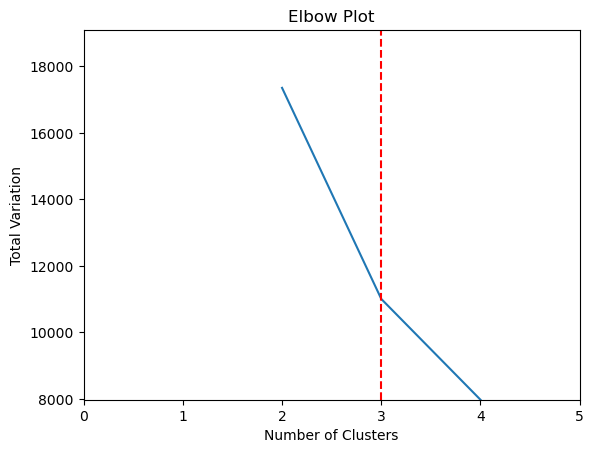

Optimal number of clusters: 3


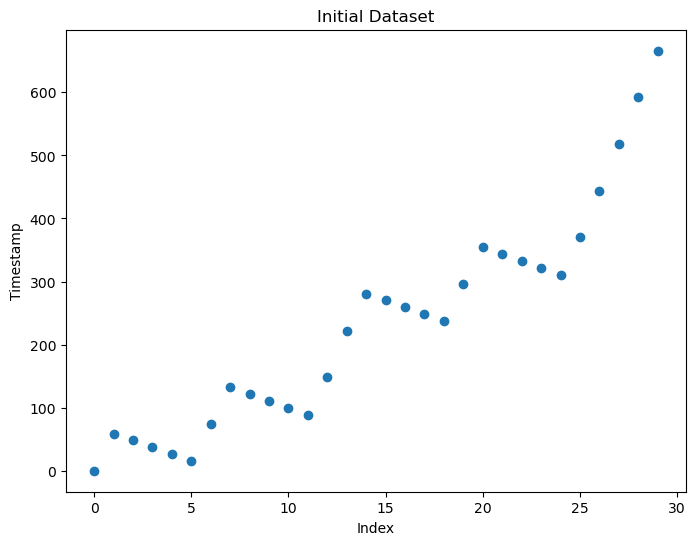

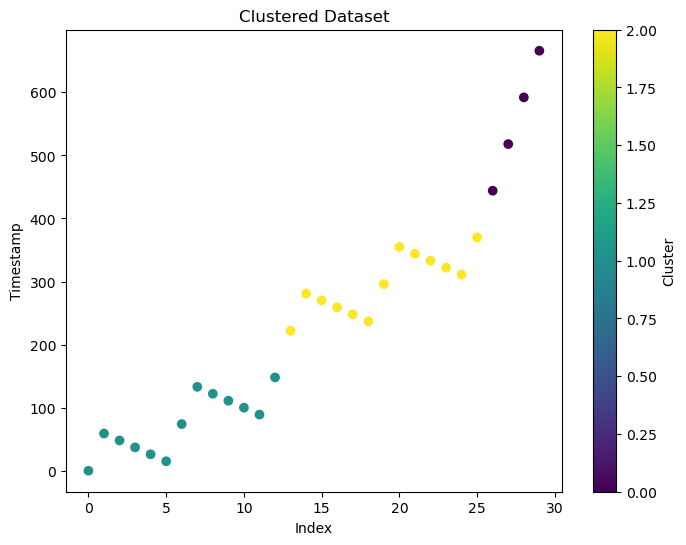

Grouped Timestamps:
Cluster 0
07:24
08:38
09:52
11:06
Cluster 1
00:00
00:59
00:48
00:37
00:26
00:15
01:14
02:13
02:02
01:51
01:40
01:29
02:28
Cluster 2
03:42
04:41
04:30
04:19
04:08
03:57
04:56
05:55
05:44
05:33
05:22
05:11
06:10


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def add_large_gaps(X, gap_size):
    num_samples = len(X)
    X_modified = []
    for i in range(num_samples):
        X_modified.append(X[i])
        if i < num_samples - 1 and np.random.rand() < 0.5:
            X_modified.extend(np.linspace(X[i] + gap_size, X[i+1] - gap_size, 5))
    return np.array(X_modified)

def find_elbow_point(X, min_clusters=2, max_clusters=None, min_improvement=0.01, cycles_without_change=10):
    if max_clusters is None:
        max_clusters = len(X)

    best_total_variation = float('inf')
    best_labels = None
    best_centers = None
    best_elbow_index = 0

    total_variations = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10)
        kmeans.fit(X.reshape(-1, 1))
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        closest_centers, _ = pairwise_distances_argmin_min(centers, X.reshape(-1, 1))
        X_partitioned = [X[labels == i] for i in range(n_clusters)]

        if any(len(x) == 0 for x in X_partitioned):
            break

        total_variation = sum(np.var(x) for x in X_partitioned)
        total_variations.append(total_variation)

        if total_variation < best_total_variation:
            best_total_variation = total_variation
            best_labels = labels + 1
            best_centers = centers
            best_elbow_index = n_clusters - 1

        if len(total_variations) >= 3:
            consecutive_improvements = np.diff(np.gradient(total_variations))
            if all(imp >= min_improvement for imp in consecutive_improvements[-cycles_without_change:]):
                break

    # Finding the elbow point
    curvature = np.gradient(np.gradient(total_variations))
    elbow_index = np.argmax(curvature)

    # Check if elbow index is at endpoints
    if elbow_index == 0:
        elbow_index += 1
    elif elbow_index == len(total_variations) - 1:
        elbow_index -= 1

    # Plotting the elbow plot with the elbow line
    clusters_range = range(min_clusters, min_clusters + len(total_variations))
    plt.plot(clusters_range, total_variations)
    plt.axvline(x=clusters_range[elbow_index], color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Total Variation')
    plt.title('Elbow Plot')

    # Updating x-axis and y-axis limits
    plt.xlim(0, min_clusters + len(total_variations))
    plt.ylim(min(total_variations), max(total_variations) * 1.1)

    plt.show()

    return best_labels, best_centers, clusters_range[elbow_index]


# Generate sample data
np.random.seed()
average_shopping_duration = np.random.randint(60, 120)
num_timestamps = np.random.randint(6, 12)
timestamps = np.linspace(0, average_shopping_duration*(num_timestamps-1), num=num_timestamps)
gap_size = np.random.randint(0, 60)
X = add_large_gaps(timestamps, gap_size)

# Plot the elbow point and determine optimal value for K 
num_samples = len(X)
num_clusters = min(num_samples, num_samples - 1)
best_labels, best_centers, optimal_k = find_elbow_point(X, max_clusters=num_clusters)
print('Optimal number of clusters:', optimal_k)
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(X.reshape(-1, 1))
best_labels = kmeans.labels_
best_centers = kmeans.cluster_centers_

# Cluster timestamps based on proximity
clustered_timestamps = {}
for label in np.unique(best_labels):
    clustered_timestamps[label] = []

for i, label in enumerate(best_labels):
    timestamp = X[i]
    minutes, seconds = divmod(int(timestamp), 60)
    time_format = '{:02d}:{:02d}'.format(minutes, seconds)
    clustered_timestamps[label].append(time_format)

# Create a plot for the initial dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Initial Dataset')
plt.show()

# Create a plot for the clustered dataset
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X)), X, c=best_labels)
plt.xlabel('Index')
plt.ylabel('Timestamp')
plt.title('Clustered Dataset')
plt.colorbar(label='Cluster')
plt.show()

# Print the grouped timestamps
print("Grouped Timestamps:")
for label in sorted(clustered_timestamps.keys()):
    print("Cluster", label)
    for timestamp in clustered_timestamps[label]:
        print(timestamp)

Version 2.0

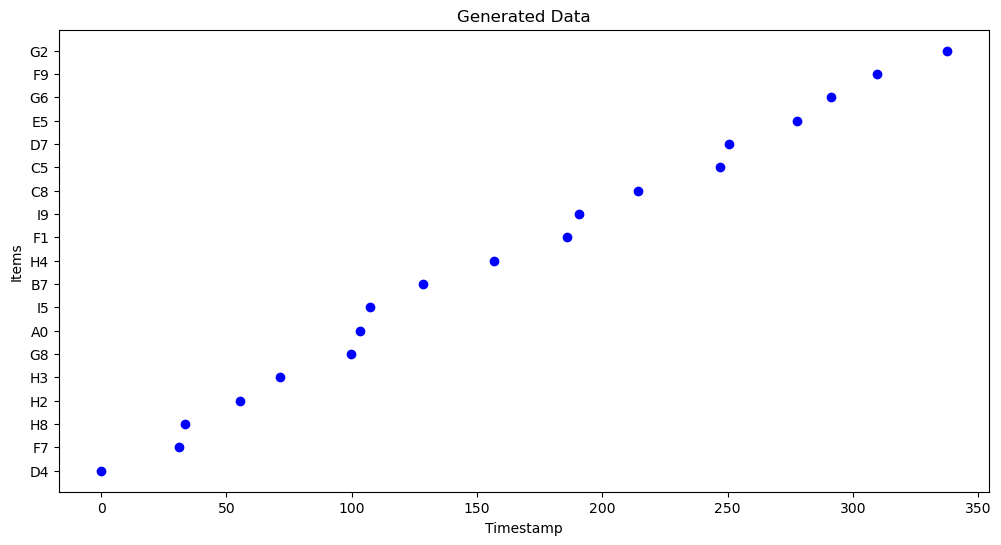

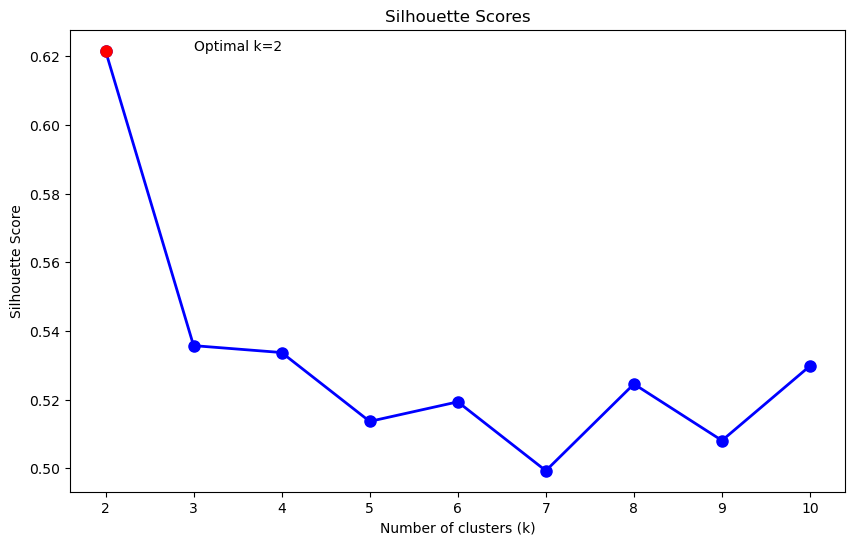

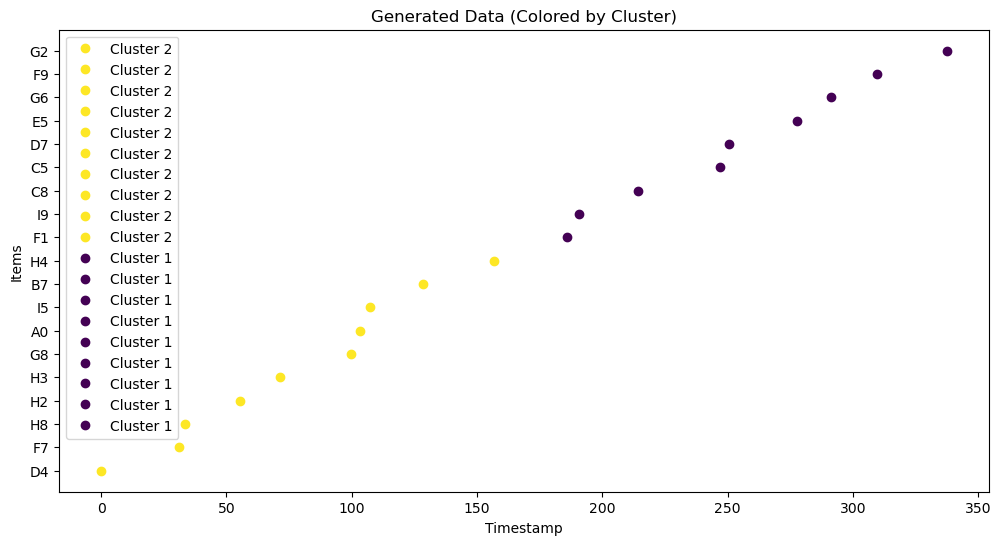

D4 - 0.0 - Cluster: 2
F7 - 31.01 - Cluster: 2
H8 - 33.65 - Cluster: 2
H2 - 55.23 - Cluster: 2
H3 - 71.24 - Cluster: 2
G8 - 99.51 - Cluster: 2
A0 - 103.19 - Cluster: 2
I5 - 107.36 - Cluster: 2
B7 - 128.3 - Cluster: 2
H4 - 156.95 - Cluster: 2
F1 - 185.74 - Cluster: 1
I9 - 190.62 - Cluster: 1
C8 - 214.26 - Cluster: 1
C5 - 246.92 - Cluster: 1
D7 - 250.4 - Cluster: 1
E5 - 277.52 - Cluster: 1
G6 - 291.25 - Cluster: 1
F9 - 309.82 - Cluster: 1
G2 - 337.43 - Cluster: 1


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        current_timestamp += np.random.uniform(X, Y)

        if np.random.rand() < 0.5:
            gap_size = np.random.uniform(X, Y) + np.random.uniform(Y, Y+20)
            current_timestamp += gap_size

    timestamps = np.round(timestamps, 2)
    return items, timestamps

# Generate sample data; x and y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()
items, timestamps = generate_dataset(item_list, X, Y, min_items, max_items)

# Plot the timestamps
plt.figure(figsize=(12, 6))
plt.plot(timestamps, range(len(items)), 'bo')
plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data')
plt.show()

# Apply k-means clustering and find the optimal k value using the Silhouette Score
silhouette_scores = []
unique_samples = len(np.unique(timestamps))
max_k = min(len(timestamps), 10)
for k in range(2, min(max_k+1, unique_samples)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_scores)+2), silhouette_scores, 'bo-', markersize=8, lw=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

# Calculate the optimal k value using the Silhouette Score
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2
plt.plot(k_optimal, silhouette_scores[k_optimal-2], 'ro', markersize=8)
plt.annotate(f'Optimal k={k_optimal}', (k_optimal, silhouette_scores[k_optimal-2]), xytext=(k_optimal+1, silhouette_scores[k_optimal-2]))

plt.show()

# Compare optimal k and unique samples
# unique_samples = len(np.unique(timestamps)) # Remove this line

# Apply k-means clustering with optimal k value
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
cluster_labels = kmeans_optimal.predict(timestamps.reshape(-1, 1))

# Sort items and timestamps based on cluster labels
sorted_indices = np.argsort(cluster_labels)
sorted_items = np.array(items)[sorted_indices]
sorted_timestamps = np.array(timestamps)[sorted_indices]
sorted_cluster_labels = cluster_labels[sorted_indices]

# Create colormap for clusters
colormap = cm.viridis

# Plot the timestamps with color according to cluster
plt.figure(figsize=(12, 6))
for i in range(len(items)):
    plt.plot(timestamps[i], i, 'o', c=colormap(cluster_labels[i] / (k_optimal-1)), label=f'Cluster {cluster_labels[i]+1}')

plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data (Colored by Cluster)')
plt.legend()
plt.show()

# Print the generated data and cluster labels
for i in range(len(items)):
    print(f"{items[i]} - {timestamps[i]} - Cluster: {cluster_labels[i]+1}")

Version 2.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)
    return items, timestamps, proximity_dict


# Generate sample data; X and Y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()
items, timestamps, proximity_dict = generate_dataset(item_list, X, Y, min_items, max_items)

# Initialize proximity dictionary
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Apply k-means clustering and find the optimal k value using the Silhouette Score
    silhouette_scores = []
    unique_samples = len(np.unique(timestamps))
    max_k = min(len(timestamps), 10)
    for k in range(2, min(max_k+1, unique_samples)):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
        cluster_labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))

    # Calculate the optimal k value using the Silhouette Score
    k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2

    # Check proximity of items based on previous cycles
    accepted_gap = None
    if cycle > 1 and len(timestamps) > 1:
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        for i in range(len(sorted_timestamps) - 1):
            gap = np.abs(float(sorted_timestamps[i+1]) - float(sorted_timestamps[i]))
            if accepted_gap is None or np.abs(gap - accepted_gap) < 1:
                accepted_gap = gap

    # Print accepted gap for proximity check
    print(f"Accepted gap for proximity: {accepted_gap}")

    # Apply k-means clustering with optimal k value
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        cluster_index = sorted_cluster_labels[i]
        plt.plot(sorted_timestamps[i], i, 'o', c=plt.cm.viridis(cluster_index / (k_optimal-1)), label=f'Cluster {cluster_index+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title(f'Generated Data - Cycle: {cycle} (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

    # Adjust clustering based on proximity memory
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

Version 2.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]
            
            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]
                
            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]
                
                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]
                    
            sorted_labels[i] = len(proximity_memory[timestamp])
        
        return items, timestamps, proximity_dict, sorted_labels
        
    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)
    
    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        cluster_index = sorted_cluster_labels[i]
        plt.plot(sorted_timestamps[i], i, 'o', c=plt.cm.viridis(cluster_index / (k_optimal-1)), label=f'Cluster {cluster_index+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title(f'Generated Data - Cycle: {cycle} (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

    # Adjust clustering based on proximity memory
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

Version 2.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]
            
            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]
                
            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]
                
                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]
                    
            sorted_labels[i] = len(proximity_memory[timestamp])
        
        return items, timestamps, proximity_dict, sorted_labels
        
    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)
    
    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        cluster_index = sorted_cluster_labels[i]
        plt.plot(sorted_timestamps[i], i, 'o', c=plt.cm.viridis(cluster_index / (k_optimal-1)), label=f'Cluster {cluster_index+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title(f'Generated Data - Cycle: {cycle} (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

    # Adjust clustering based on proximity memory
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

# Generate proximity matrix
proximity_matrix = np.zeros((len(items), len(items)))

for i in range(len(items)):
    item1 = items[i]
    for j in range(i + 1, len(items)):
        item2 = items[j]
        gap = np.abs(float(timestamps[j]) - float(timestamps[i]))
        if gap in proximity_memory and isinstance(gap, tuple) and (item1, item2) in proximity_memory[gap]:
            proximity_matrix[i, j] = 1
            proximity_matrix[j, i] = 1

# Plot proximity matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(proximity_matrix, cmap='hot', interpolation='nearest')
plt.xticks(range(len(items)), items)
plt.yticks(range(len(items)), items)
plt.xlabel('Item')
plt.ylabel('Item')
plt.title('Proximity Matrix')
plt.colorbar()
plt.show()

Version 2.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]

            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]

            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]

                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]

            sorted_labels[i] = len(proximity_memory[timestamp])

        return items, timestamps, proximity_dict, sorted_labels

    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    item_list = generate_item_list()
    X = 0
    Y = 1
    min_items = 5
    max_items = 20
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)

    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Adjust clustering based on proximity memory
    accepted_gap = True
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

    # Create the proximity matrix
    proximity_matrix = np.zeros((len(items), len(items)))
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            item1 = items[i]
            item2 = items[j]
            time_gap = np.abs(float(timestamps[i]) - float(timestamps[j]))
            proximity_matrix[i][j] = time_gap
            proximity_matrix[j][i] = time_gap

    # Plot the proximity matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(proximity_matrix, cmap='viridis')
    plt.title('Proximity Matrix')
    plt.colorbar(label='Time Gap')
    plt.xticks(range(len(items)), items, rotation=90)
    plt.yticks(range(len(items)), items)
    plt.show()

Version 2.6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)
    
    timestamps = []
    current_timestamp = 0
    proximity_dict = {}
    
    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]

            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]

            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]

                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]

            sorted_labels[i] = len(proximity_memory[timestamp])

        return items, timestamps, proximity_dict, sorted_labels

    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Initialize empty proximity matrix
proximity_matrix = None

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    item_list = generate_item_list()
    X = 0
    Y = 1
    min_items = 50
    max_items = 100
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)

    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Adjust clustering based on proximity memory
    accepted_gap = True
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # Re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

    # Update proximity matrix
    proximity_matrix_size = len(items)  # Update size based on updated items
    if proximity_matrix is None or proximity_matrix.shape != (proximity_matrix_size, proximity_matrix_size):
        proximity_matrix = np.zeros((proximity_matrix_size, proximity_matrix_size))
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            item1 = items[i]
            item2 = items[j]
            time_gap = np.abs(float(timestamps[i]) - float(timestamps[j]))
            proximity_matrix[i][j] += time_gap
            proximity_matrix[j][i] += time_gap  

# Normalize proximity matrix
normalized_proximity_matrix = proximity_matrix / 100

# Plot the proximity matrix
plt.figure(figsize=(8, 6))
plt.imshow(normalized_proximity_matrix, cmap='viridis')
plt.title('Proximity Matrix')
plt.colorbar(label='Time Gap')
plt.xticks(range(len(items)), items, rotation=90)
plt.yticks(range(len(items)), items)
plt.show()

Version 3.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]
            
            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]
                
            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]
                
                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]
                    
            sorted_labels[i] = len(proximity_memory[timestamp])
        
        return items, timestamps, proximity_dict, sorted_labels
        
    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)
    
    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        cluster_index = sorted_cluster_labels[i]
        plt.plot(sorted_timestamps[i], i, 'o', c=plt.cm.viridis(cluster_index / (k_optimal-1)), label=f'Cluster {cluster_index+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title(f'Generated Data - Cycle: {cycle} (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

    # Adjust clustering based on proximity memory
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

# Generate proximity matrix
proximity_matrix = np.zeros((len(items), len(items)))

for i in range(len(items)):
    item1 = items[i]
    for j in range(i + 1, len(items)):
        item2 = items[j]
        gap = np.abs(float(timestamps[j]) - float(timestamps[i]))
        if gap in proximity_memory and isinstance(gap, tuple) and (item1, item2) in proximity_memory[gap]:
            proximity_matrix[i, j] = 1
            proximity_matrix[j, i] = 1

# Plot proximity matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(proximity_matrix, cmap='hot', interpolation='nearest')
plt.xticks(range(len(items)), items)
plt.yticks(range(len(items)), items)
plt.xlabel('Item')
plt.ylabel('Item')
plt.title('Proximity Matrix')
plt.colorbar()
plt.show()

Version 3.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset


def generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0
    proximity_dict = {}

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        proximity_dict[current_timestamp] = []
        current_timestamp += np.random.uniform(X, Y)

    timestamps = np.round(timestamps, 2)

    if len(timestamps) > 1:
        # Update proximity dictionary based on previous cluster labels
        sorted_indices = np.argsort(timestamps)
        sorted_timestamps = timestamps[sorted_indices]
        sorted_items = items[sorted_indices]
        sorted_labels = np.zeros_like(timestamps)
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            timestamp = sorted_timestamps[i]
            
            if timestamp in proximity_memory:
                proximity_memory[timestamp].append(item)
            else:
                proximity_memory[timestamp] = [item]
                
            if i < len(sorted_items) - 1:
                next_item = sorted_items[i + 1]
                next_timestamp = sorted_timestamps[i + 1]
                
                gap = np.abs(float(next_timestamp) - float(timestamp))
                if gap in proximity_memory:
                    proximity_memory[gap].append((item, next_item))
                else:
                    proximity_memory[gap] = [(item, next_item)]
                    
            sorted_labels[i] = len(proximity_memory[timestamp])
        
        return items, timestamps, proximity_dict, sorted_labels
        
    return items, timestamps, proximity_dict, np.zeros_like(timestamps)

# Initialize proximity memory
proximity_memory = {}

# Run cycles
for cycle in range(1, 101):
    # Generate new dataset
    items, timestamps, proximity_dict, cluster_labels = generate_dataset(item_list, X, Y, min_items, max_items, proximity_memory)
    
    # Apply k-means clustering with optimal k value
    k_optimal = max(2, len(set(cluster_labels)))
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.labels_

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Update proximity dictionary with new cluster labels
    for i in range(len(sorted_items)):
        item1 = sorted_items[i]
        timestamp1 = sorted_timestamps[i]
        if timestamp1 in proximity_memory:
            proximity_memory[timestamp1].append(item1)
        else:
            proximity_memory[timestamp1] = [item1]
        if i < len(sorted_items) - 1:
            item2 = sorted_items[i+1]
            timestamp2 = sorted_timestamps[i+1]
            gap = np.abs(float(timestamp2) - float(timestamp1))
            if gap in proximity_memory:
                proximity_memory[gap].append((item1, item2))
            else:
                proximity_memory[gap] = [(item1, item2)]

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        cluster_index = sorted_cluster_labels[i]
        plt.plot(sorted_timestamps[i], i, 'o', c=plt.cm.viridis(cluster_index / (k_optimal-1)), label=f'Cluster {cluster_index+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title(f'Generated Data - Cycle: {cycle} (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

    # Adjust clustering based on proximity memory
    if accepted_gap:
        proximity_clusters = {}
        for gap, items_pairs in proximity_memory.items():
            if isinstance(gap, tuple):
                item1, item2 = gap[0], gap[1]
                if item1 not in proximity_clusters:
                    proximity_clusters[item1] = [item1, item2]
                else:
                    proximity_clusters[item1].append(item2)
                if item2 not in proximity_clusters:
                    proximity_clusters[item2] = [item2, item1]
                else:
                    proximity_clusters[item2].append(item1)

        # Update cluster labels based on proximity clusters
        for i in range(len(sorted_items)):
            item = sorted_items[i]
            if item in proximity_clusters:
                closest_item = min(proximity_clusters[item], key=lambda x: np.abs(sorted_timestamps[i] - sorted_timestamps[np.where(sorted_items == x)][0]))
                closest_index = np.where(sorted_items == closest_item)[0][0]
                sorted_cluster_labels[closest_index] = sorted_cluster_labels[i]

    # re-sort items and timestamps based on updated cluster labels
    sorted_indices = np.argsort(sorted_cluster_labels)
    sorted_items = sorted_items[sorted_indices]
    sorted_timestamps = sorted_timestamps[sorted_indices]
    sorted_cluster_labels = sorted_cluster_labels[sorted_indices]

    # Assign new cluster labels to items and timestamps
    items = sorted_items
    timestamps = sorted_timestamps
    cluster_labels = sorted_cluster_labels

# Generate proximity matrix
proximity_matrix = np.zeros((len(items), len(items)))

for i in range(len(items)):
    item1 = items[i]
    for j in range(i + 1, len(items)):
        item2 = items[j]
        gap = np.abs(float(timestamps[j]) - float(timestamps[i]))
        if gap in proximity_memory and isinstance(gap, tuple) and (item1, item2) in proximity_memory[gap]:
            proximity_matrix[i, j] = 1
            proximity_matrix[j, i] = 1

# Plot proximity matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(proximity_matrix, cmap='hot', interpolation='nearest')
plt.xticks(range(len(items)), items)
plt.yticks(range(len(items)), items)
plt.xlabel('Item')
plt.ylabel('Item')
plt.title('Proximity Matrix')
plt.colorbar()
plt.show()

Version 3.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        current_timestamp += np.random.uniform(X, Y)

        if np.random.rand() < 0.5:
            gap_size = np.random.uniform(X, Y) + np.random.uniform(Y, Y+20)
            current_timestamp += gap_size

    timestamps = np.round(timestamps, 2)
    return items, timestamps

# Generate sample data; x and y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()
items, timestamps = generate_dataset(item_list, X, Y, min_items, max_items)

# Plot the timestamps
plt.figure(figsize=(12, 6))
plt.plot(timestamps, range(len(items)), 'bo')
plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data')
plt.show()

# Apply k-means clustering and find the optimal k value using the Silhouette Score
silhouette_scores = []
unique_samples = len(np.unique(timestamps))
max_k = min(len(timestamps), 10)
for k in range(2, min(max_k+1, unique_samples)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(silhouette_scores)+2), silhouette_scores, 'bo-', markersize=8, lw=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

# Calculate the optimal k value using the Silhouette Score
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2
plt.plot(k_optimal, silhouette_scores[k_optimal-2], 'ro', markersize=8)
plt.annotate(f'Optimal k={k_optimal}', (k_optimal, silhouette_scores[k_optimal-2]), xytext=(k_optimal+1, silhouette_scores[k_optimal-2]))

plt.show()

# Compare optimal k and unique samples
# unique_samples = len(np.unique(timestamps)) # Remove this line

# Apply k-means clustering with optimal k value
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
cluster_labels = kmeans_optimal.predict(timestamps.reshape(-1, 1))

# Sort items and timestamps based on cluster labels
sorted_indices = np.argsort(cluster_labels)
sorted_items = np.array(items)[sorted_indices]
sorted_timestamps = np.array(timestamps)[sorted_indices]
sorted_cluster_labels = cluster_labels[sorted_indices]

# Create colormap for clusters
colormap = cm.viridis

# Plot the timestamps with color according to cluster
plt.figure(figsize=(12, 6))
for i in range(len(items)):
    plt.plot(timestamps[i], i, 'o', c=colormap(cluster_labels[i] / (k_optimal-1)), label=f'Cluster {cluster_labels[i]+1}')

plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data (Colored by Cluster)')
plt.legend()
plt.show()

# Print the generated data and cluster labels
for i in range(len(items)):
    print(f"{items[i]} - {timestamps[i]} - Cluster: {cluster_labels[i]+1}")

Version 3.3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        current_timestamp += np.random.uniform(X, Y)

        if np.random.rand() < 0.5:
            gap_size = np.random.uniform(X, Y) + np.random.uniform(Y, Y+20)
            current_timestamp += gap_size

    timestamps = np.round(timestamps, 2)
    return items, timestamps

# Generate sample data; x and y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()
items, timestamps = generate_dataset(item_list, X, Y, min_items, max_items)

# Apply k-means clustering and find the optimal k value using the Silhouette Score
silhouette_scores = []
unique_samples = len(np.unique(timestamps))
max_k = min(len(timestamps), 10)
for k in range(2, min(max_k+1, unique_samples)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))


# Calculate the optimal k value using the Silhouette Score
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2

# Apply k-means clustering with optimal k value
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
cluster_labels = kmeans_optimal.predict(timestamps.reshape(-1, 1))

# Sort items and timestamps based on cluster labels
sorted_indices = np.argsort(cluster_labels)
sorted_items = np.array(items)[sorted_indices]
sorted_timestamps = np.array(timestamps)[sorted_indices]
sorted_cluster_labels = cluster_labels[sorted_indices]

# Create colormap for clusters
colormap = cm.viridis

# Plot the timestamps with color according to cluster
plt.figure(figsize=(12, 6))
for i in range(len(items)):
    plt.plot(timestamps[i], i, 'o', c=colormap(cluster_labels[i] / (k_optimal-1)), label=f'Cluster {cluster_labels[i]+1}')

plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data (Colored by Cluster)')
plt.legend()
plt.show()

# Print the generated data and cluster labels
for i in range(len(items)):
    print(f"{items[i]} - {timestamps[i]} - Cluster: {cluster_labels[i]+1}")

Version 3.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        current_timestamp += np.random.uniform(X, Y)

        if np.random.rand() < 0.5:
            gap_size = np.random.uniform(X, Y) + np.random.uniform(Y, Y+20)
            current_timestamp += gap_size

    timestamps = np.round(timestamps, 2)
    return items, timestamps

# Generate sample data; X and Y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()

# Run the code for 100 cycles
for _ in range(100):
    items, timestamps = generate_dataset(item_list, X, Y, min_items, max_items)

    # Apply k-means clustering and find the optimal k value using the Silhouette Score
    silhouette_scores = []
    unique_samples = len(np.unique(timestamps))
    max_k = min(len(timestamps), 10)
    for k in range(2, min(max_k+1, unique_samples)):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
        cluster_labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))

    # Calculate the optimal k value using the Silhouette Score
    k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2

    # Apply k-means clustering with optimal k value
    kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans_optimal.predict(timestamps.reshape(-1, 1))

    # Sort items and timestamps based on cluster labels
    sorted_indices = np.argsort(cluster_labels)
    sorted_items = np.array(items)[sorted_indices]
    sorted_timestamps = np.array(timestamps)[sorted_indices]
    sorted_cluster_labels = cluster_labels[sorted_indices]

    # Create colormap for clusters
    colormap = cm.viridis

    # Plot the timestamps with color according to cluster
    plt.figure(figsize=(12, 6))
    for i in range(len(items)):
        plt.plot(sorted_timestamps[i], i, 'o', c=colormap(sorted_cluster_labels[i] / (k_optimal-1)), label=f'Cluster {sorted_cluster_labels[i]+1}')

    plt.yticks(range(len(items)), sorted_items)
    plt.xlabel('Timestamp')
    plt.ylabel('Items')
    plt.title('Generated Data (Colored by Cluster)')
    plt.legend()
    plt.show()

    # Print the generated data and cluster labels
    for i in range(len(items)):
        print(f"{sorted_items[i]} - {sorted_timestamps[i]} - Cluster: {sorted_cluster_labels[i]+1}")

Version 3.5

D4 - 0.0
E9 - 2.1
H4 - 4.68
D1 - 25.55
B9 - 52.56
J0 - 65.71
B3 - 70.11
J6 - 73.17
G5 - 75.19
B6 - 104.34
A7 - 135.37
D7 - 139.99
A6 - 159.12
I1 - 162.51
I9 - 179.73
H1 - 210.82
C1 - 213.11
C9 - 238.86
F1 - 242.44
J9 - 267.53
D5 - 270.94
D3 - 299.1
F3 - 303.27


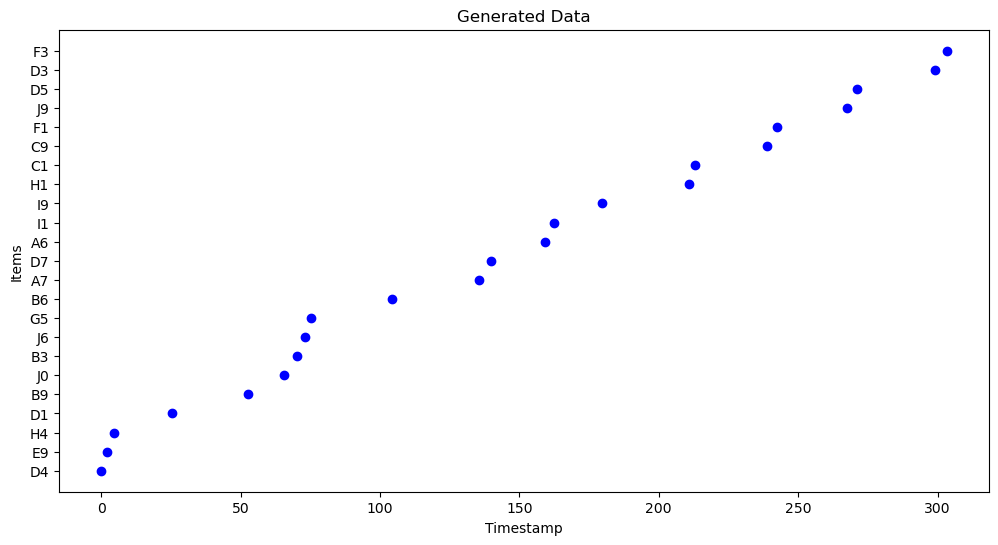

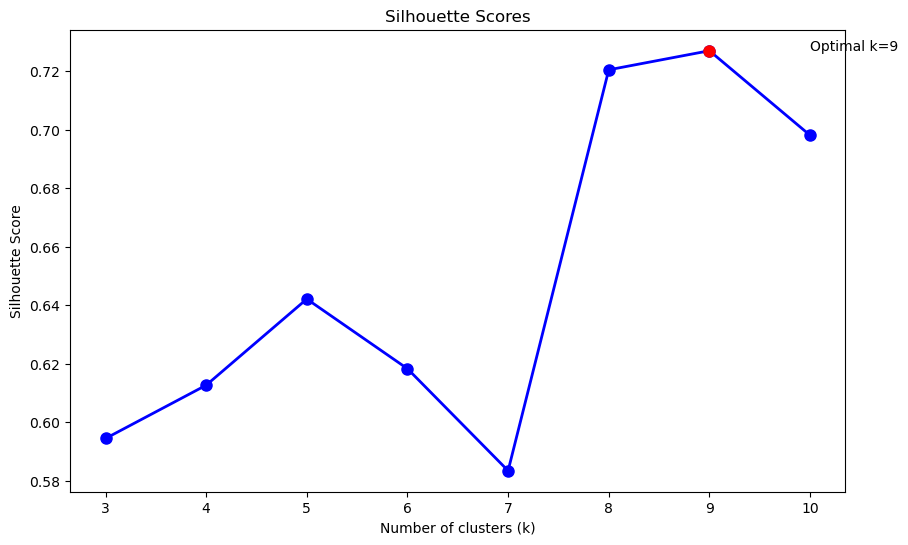

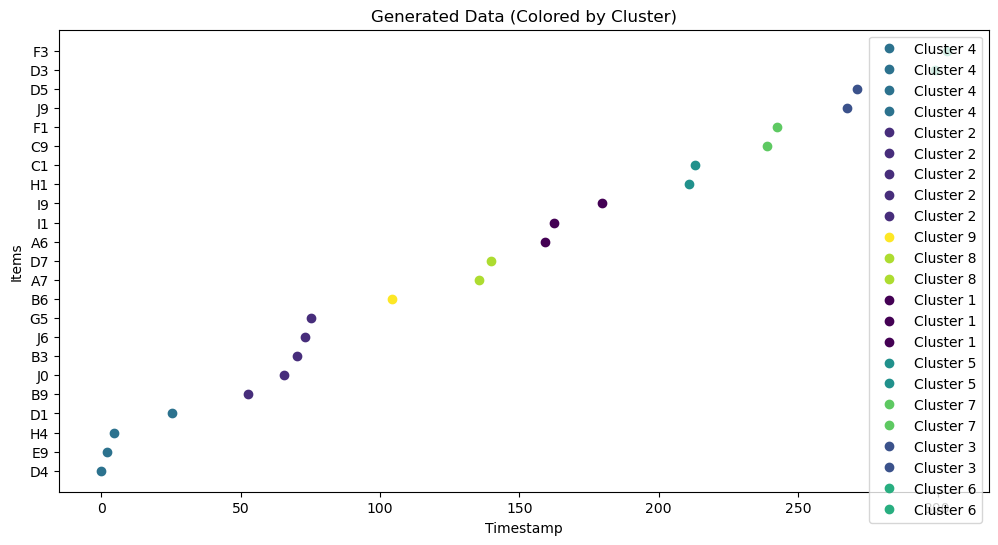

D4 - 0.0 - Cluster: 4
E9 - 2.1 - Cluster: 4
H4 - 4.68 - Cluster: 4
D1 - 25.55 - Cluster: 4
B9 - 52.56 - Cluster: 2
J0 - 65.71 - Cluster: 2
B3 - 70.11 - Cluster: 2
J6 - 73.17 - Cluster: 2
G5 - 75.19 - Cluster: 2
B6 - 104.34 - Cluster: 9
A7 - 135.37 - Cluster: 8
D7 - 139.99 - Cluster: 8
A6 - 159.12 - Cluster: 1
I1 - 162.51 - Cluster: 1
I9 - 179.73 - Cluster: 1
H1 - 210.82 - Cluster: 5
C1 - 213.11 - Cluster: 5
C9 - 238.86 - Cluster: 7
F1 - 242.44 - Cluster: 7
J9 - 267.53 - Cluster: 3
D5 - 270.94 - Cluster: 3
D3 - 299.1 - Cluster: 6
F3 - 303.27 - Cluster: 6


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_item_list():
    dataset = []
    for i in range(10):
        for j in range(10):
            dataset.append(chr(ord('A') + i) + str(j))
    return dataset

def generate_dataset(item_list, X, Y, min_items, max_items):
    num_items = np.random.randint(min_items, max_items+1)
    items = np.random.choice(item_list, size=num_items, replace=False)

    timestamps = []
    current_timestamp = 0

    for _ in range(num_items):
        timestamps.append(current_timestamp)
        current_timestamp += np.random.uniform(X, Y)

        if np.random.rand() < 0.5:
            gap_size = np.random.uniform(X, Y) + np.random.uniform(Y, Y+20)
            current_timestamp += gap_size

    timestamps = np.round(timestamps, 2)
    return items, timestamps

# Generate sample data; x and y is the range for the number of timestamps generated before a bigger gap to simulate natural clustering
X = 2
Y = 5
min_items = 5
max_items = 30

item_list = generate_item_list()
items, timestamps = generate_dataset(item_list, X, Y, min_items, max_items)

for i in range(len(items)):
    print(f"{items[i]} - {timestamps[i]}")

# Plot the timestamps
plt.figure(figsize=(12, 6))
plt.plot(timestamps, range(len(items)), 'bo')
plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data')
plt.show()

# Apply k-means clustering and find the optimal k value using the Silhouette Score
silhouette_scores = []
unique_samples = len(np.unique(timestamps))
max_k = min(len(timestamps), 10)
for k in range(3, min(max_k+1, unique_samples)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(timestamps.reshape(-1, 1), cluster_labels))

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(3, len(silhouette_scores)+3), silhouette_scores, 'bo-', markersize=8, lw=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

# Calculate the optimal k value using the Silhouette Score
k_optimal = silhouette_scores.index(max(silhouette_scores)) + 3
plt.plot(k_optimal, silhouette_scores[k_optimal-3], 'ro', markersize=8)
plt.annotate(f'Optimal k={k_optimal}', (k_optimal, silhouette_scores[k_optimal-3]), xytext=(k_optimal+1, silhouette_scores[k_optimal-3]))
plt.show()

# Apply k-means clustering with optimal k value
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=0).fit(timestamps.reshape(-1, 1))
cluster_labels = kmeans_optimal.predict(timestamps.reshape(-1, 1))

# Sort items and timestamps based on cluster labels
sorted_indices = np.argsort(cluster_labels)
sorted_items = np.array(items)[sorted_indices]
sorted_timestamps = np.array(timestamps)[sorted_indices]
sorted_cluster_labels = cluster_labels[sorted_indices]

# Create colormap for clusters
colormap = cm.viridis

# Plot the timestamps with color according to cluster
plt.figure(figsize=(12, 6))
for i in range(len(items)):
    plt.plot(timestamps[i], i, 'o', c=colormap(cluster_labels[i] / (k_optimal-1)), label=f'Cluster {cluster_labels[i]+1}')

plt.yticks(range(len(items)), items)
plt.xlabel('Timestamp')
plt.ylabel('Items')
plt.title('Generated Data (Colored by Cluster)')
plt.legend()
plt.show()

# Print the generated data and cluster labels
for i in range(len(items)):
    print(f"{items[i]} - {timestamps[i]} - Cluster: {cluster_labels[i]+1}")